# A few Challenges

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = pd.read_csv("assignment2_part1.csv")

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

In [3]:
data1 = data.drop('Unnamed: 0', axis=1)

In [4]:
train, validation, test = np.split(data1.sample(frac=1),[int(0.8*len(data1)),int(0.9*len(data1))])
test = test.sort_values(by='x')

### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

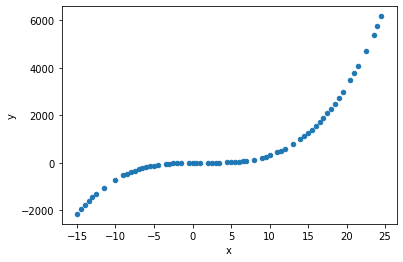

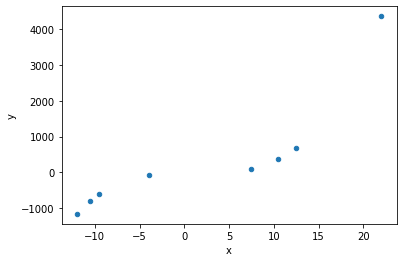

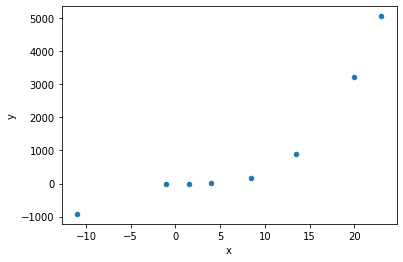

In [5]:
train.plot(x='x',y='y',kind='scatter')
validation.plot(x='x',y='y',kind='scatter')
test.plot(x='x',y='y',kind='scatter')

In [6]:
lm = smf.ols(formula='y~x', data = train).fit()
print(lm.summary())

#I don't think the data is suitable for a linear model, it should be polynomial regression.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           1.29e-21
Time:                        20:32:33   Log-Likelihood:                -522.59
No. Observations:                  64   AIC:                             1049.
Df Residuals:                      62   BIC:                             1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.4193    116.935      0.371      0.7

### Task 4: Visualize the regression fit

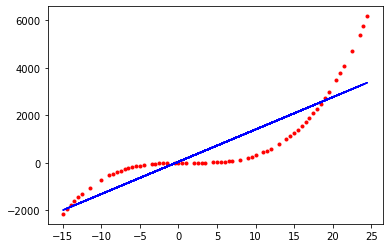

In [7]:
train['ypred']=lm.predict() 
plt.plot(train.x,train.y,'.r')
plt.plot(train.x,train.ypred,'b') 

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

In [8]:
train['x3']=train.x**3

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

In [9]:
lm = smf.ols(formula='y~x+x3', data = train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4534.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           4.58e-67
Time:                        20:32:33   Log-Likelihood:                -409.73
No. Observations:                  64   AIC:                             825.5
Df Residuals:                      61   BIC:                             831.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -175.3156     20.794     -8.431      0.0

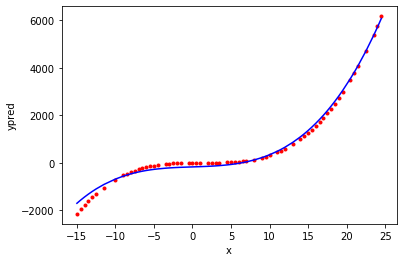

In [10]:
import seaborn as sns
train['ypred']=lm.predict()
plt.plot(train.x,train.y,'.r')
sns.lineplot(train.x,train.ypred,color='b') 

# This fits well!

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

In [11]:
# First train it on the training set. The result seems perfect.
M=12
for p in range(1,M+1): 
    train['x%d'%p]=train.x**p
train.head()

,x,y,ypred,x3,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12
62,16.0,1547.609212,1662.463780,4096.000,16.0,256.00,65536.0000,1.048576e+06,1.677722e+07,2.684355e+08,4.294967e+09,6.871948e+10,1.099512e+12,1.759219e+13,2.814750e+14
53,11.5,503.038243,565.343289,1520.875,11.5,132.25,17490.0625,2.011357e+05,2.313061e+06,2.660020e+07,3.059023e+08,3.517876e+09,4.045558e+10,4.652391e+11,5.350250e+12
68,19.0,2721.708052,2820.460753,6859.000,19.0,361.00,130321.0000,2.476099e+06,4.704588e+07,8.938717e+08,1.698356e+10,3.226877e+11,6.131066e+12,1.164903e+14,2.213315e+15
56,13.0,770.448939,856.742058,2197.000,13.0,169.00,28561.0000,3.712930e+05,4.826809e+06,6.274852e+07,8.157307e+08,1.060450e+10,1.378585e+11,1.792160e+12,2.329809e+13
13,-8.5,-465.015577,-514.818845,-614.125,-8.5,72.25,5220.0625,-4.437053e+04,3.771495e+05,-3.205771e+06,2.724905e+07,-2.316169e+08,1.968744e+09,-1.673432e+10,1.422418e+11


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.456e+05
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          4.63e-115
Time:                        20:32:34   Log-Likelihood:                -246.89
No. Observations:                  64   AIC:                             513.8
Df Residuals:                      54   BIC:                             535.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   1.23e-05     13.142      0.0

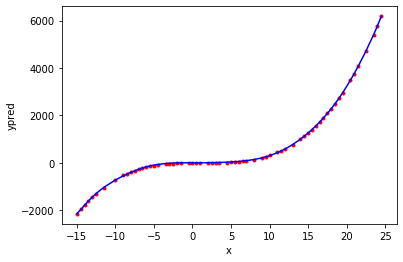

In [12]:
formula='y~x+'+'+'.join(['x%d'%p for p in range(2,M+1)])
lm12 = smf.ols(formula=formula, data = train).fit()
print(lm12.summary())
train['ypred']=lm12.predict() 
plt.plot(train.x,train.y,'.r') 
sns.lineplot(train.x,train.ypred,color='b') 

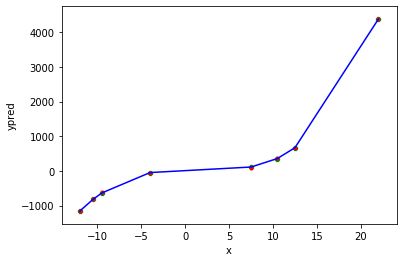

In [13]:
# Let's see it on the validation set

for p in range(1,M+1): 
    validation['x%d'%p]=validation.x**p
validation['ypred']=lm12.predict(validation)
plt.plot(validation.x,validation.y,'.r')
sns.lineplot(validation.x,validation.ypred,color='b')
sns.scatterplot(validation.x,validation.ypred,color='g')

### Task 8:Compute R2 over the validation data

In [14]:
ValidR2=1-((validation.ypred-validation.y)**2).sum()/((validation.y-validation.y.mean())**2).sum()
ValidR2

0.9999284305756718

### Task 9: Did you get an optimal value with M=12?

   Although it shouldn't be optimal because of overfitting, this one is also good because all points in this dataset are generated by a specific function and the result can be precisely predicted as long as the highest power of x is greater than 2. 
   
   With the power of x keep growing, the model identify the trend and make parameters of x4, x5 and so on so small that can be ignored.

### Task 10:Generate regressors in the test sample and compute the model prediction

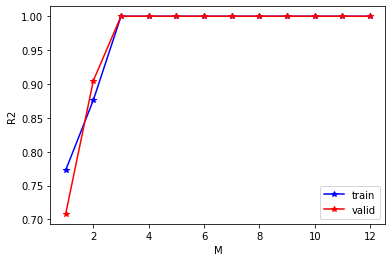

In [15]:
# Choose the optimal M
TrainR2=[0]*12
ValidR2=[0]*12
lm=[0]*12
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm[M-1] = smf.ols(formula=formula, data = train).fit()
    validation['ypred']=lm[M-1].predict(validation)
    ValidR2[M-1]=1-((validation.ypred-validation.y)**2).sum()/((validation.y-validation.y.mean())**2).sum()
    TrainR2[M-1]=lm[M-1].rsquared

plt.plot(range(1,13),TrainR2[:12],'b-*',label='train')
plt.plot(range(1,13),ValidR2[:12],'r-*',label='valid')
plt.xlabel('M')
plt.ylabel('R2')
plt.legend(loc='lower right')

In [16]:
test['x2']=test.x**2
test['x3']=test.x**3
lm3 = smf.ols(formula='y~x+x2+x3', data = train).fit()
test['ypred']=lm3.predict(test)
test['ypred'],test.y

(8     -921.754513
 28      -7.035766
 33      -4.623200
 38       0.952423
 47     168.456611
 57     876.780731
 70    3216.882223
 76    5044.507753
 Name: ypred, dtype: float64, 8     -917.935911
 28      -8.718689
 33      -7.816780
 38       7.489708
 47     165.848407
 57     877.324955
 70    3212.727817
 76    5049.983454
 Name: y, dtype: float64)

As told before, in this particular case, we could actually choose any M greater than 2, but I'd like to choose 3 for it has least model complexity.

### Task 11:Visulaize results of Task 10.

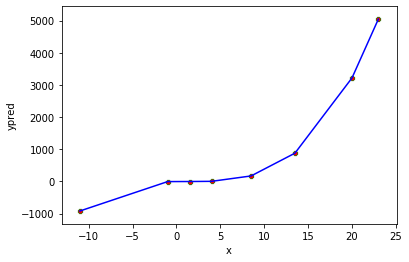

In [17]:
plt.plot(test.x,test.y,'.r') 
plt.plot(test.x,test.ypred,'b')
sns.scatterplot(test.x,test.ypred,color='g')
# In this situation we pick 3 because when power of x is more 3, the coef become so small that can be ignored.
# We could safely arrive at the conclusion that the dataset is function of x**3

## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [18]:
data4 = pd.read_csv('data/IncomeEduReg.csv')
data4.dropna(inplace = True)  #drop NAN to avoid invalid computation
data4 = pd.concat([data4.IncomePerCapita,      # Convert unit to 1k USD, only for scaling purpose
        data4.iloc[:,3:].div(data4.PopOver25, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)
data4.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [19]:
data4['Advanced'] = data4['Master'] + data4['Doctorate'] + data4['ProfSchool']
lm2_2 = smf.ols(formula = 'IncomePerCapita ~ Advanced', data = data4).fit()
print(lm2_2.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     891.0
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.06e-71
Time:                        20:32:37   Log-Likelihood:                -1959.5
No. Observations:                 181   AIC:                             3923.
Df Residuals:                     179   BIC:                             3929.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1857.3273   1539.833      1.206      0.2

In [20]:
data4['Lesser'] = data4['LessThanHS'] + data4['HighSchool'] + data4['SomeCollege']
lm2_3 = smf.ols(formula = 'IncomePerCapita ~ Lesser', data = data4).fit()
print(lm2_3.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     901.5
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.60e-72
Time:                        20:32:37   Log-Likelihood:                -1958.6
No. Observations:                 181   AIC:                             3921.
Df Residuals:                     179   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.173e+05   2762.512     42.463      0.0

In [51]:
lm2_1 = smf.ols(formula = 'IncomePerCapita ~ Bachelor + Advanced + Lesser-1', data = data4).fit()
print(lm2_1.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     472.5
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           6.38e-72
Time:                        20:33:20   Log-Likelihood:                -1954.6
No. Observations:                 181   AIC:                             3915.
Df Residuals:                     178   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bachelor    6.273e+04   1.94e+04      3.226      0.0

### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

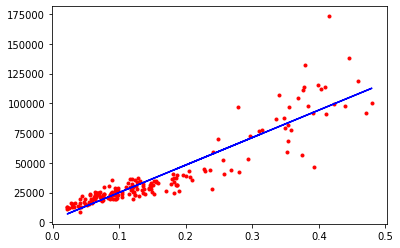

In [22]:
data4['pred_IPC_A']=lm2_2.predict() 
plt.plot(data4.Advanced,data4.IncomePerCapita,'.r') 
plt.plot(data4.Advanced,data4.pred_IPC_A,'b') 

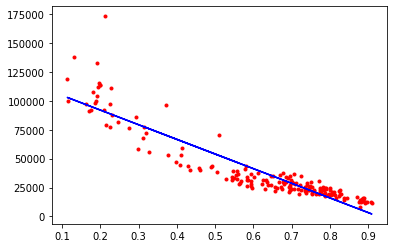

In [23]:
data4['pred_IPC_L']=lm2_3.predict() 
plt.plot(data4.Lesser,data4.IncomePerCapita,'.r') 
plt.plot(data4.Lesser,data4.pred_IPC_L,'b') 

Now it's clear to see that IPC does increase with a higher degree percentage. Studying hard really pays back. Let's visualize what we ought to do.

Text(0, 0.5, 'Observed Income')

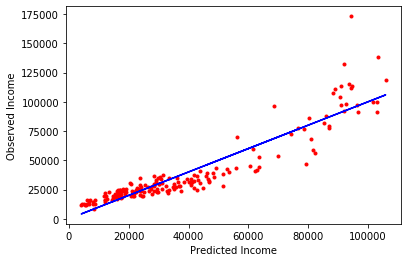

In [55]:
# Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.
plt.plot(lm2_1.predict(), data4['IncomePerCapita'],'.r')
plt.plot(lm2_1.predict(), lm2_1.predict(),'b')
plt.xlabel('Predicted Income')
plt.ylabel('Observed Income')

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [24]:
msa = pd.read_csv('data/msalist1.csv', encoding = "ISO-8859-1")
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [25]:
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv') #Load crime data
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent_Crimes', \
                          u'SE_T002_003' : 'Property_Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent_Crimes', 'Property_Crimes']]

def num(s):
    try:
        return int(s)
    except ValueError:
        0

crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)


crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')

msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent_Crimes', u'Property_Crimes']]
msaCrime.head()

,Population,Crimes,Violent_Crimes,Property_Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [26]:
msa.head()

,msa,msa_name,Geo_FIPS,county,ID
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX",48059
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX",48253
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX",48441
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH",39133
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH",39153


In [27]:
msaCrime = msaCrime[['Population', 'Crimes', 'Violent_Crimes', 'Property_Crimes']]
df = msaCrime.dropna(axis=0, how='any')
df1 = df.loc[df['Crimes'] > 0]

In [28]:
len(df1)

337

In [29]:
# Prepare the data
df1.head()

,Population,Crimes,Violent_Crimes,Property_Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [30]:
# implement Log Scale and fit the regression
logPop = np.log(df1['Population'])
logCrime = np.log(df1['Crimes'])
dataLog = pd.DataFrame(data=[logCrime, logPop]).T
dataLog.sort_values(by='Crimes', ascending=False, inplace=True) #Sorting values for better visualization

lmCrime = smf.ols('Crimes~Population', data=dataLog).fit()
print(lmCrime.summary())

                            OLS Regression Results                            
Dep. Variable:                 Crimes   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           2.29e-33
Time:                        20:32:38   Log-Likelihood:                -542.10
No. Observations:                 337   AIC:                             1088.
Df Residuals:                     335   BIC:                             1096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1676      0.768     -4.127      0.0

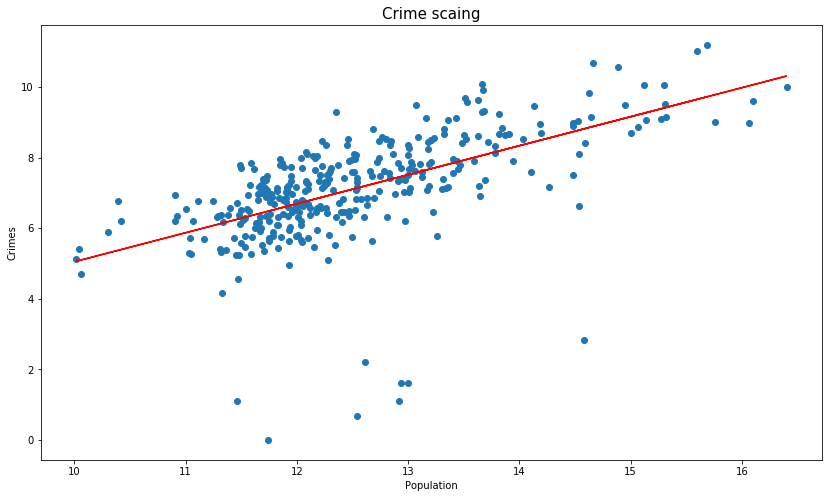

In [31]:
plt.figure(figsize=(14,8))
plt.plot(dataLog['Population'], dataLog['Crimes'], 'o')
plt.title('Crime scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Crimes')
plt.plot(dataLog['Population'], lmCrime.predict(), '-r')
# Visualize the regression

In [32]:
lmCrime.conf_int(alpha=0.05)

,0,1
Intercept,-4.677330,-1.657776
Population,0.701814,0.941740


In [33]:
lmCrime.conf_int(alpha=0.01)

,0,1
Intercept,-5.155893,-1.179213
Population,0.663789,0.979765


Even with 99% CI, the q of total crimes still doesn't reach 1. This is reasonable because crime rate increase shouldn't be as quick or even quicker than that of the population.

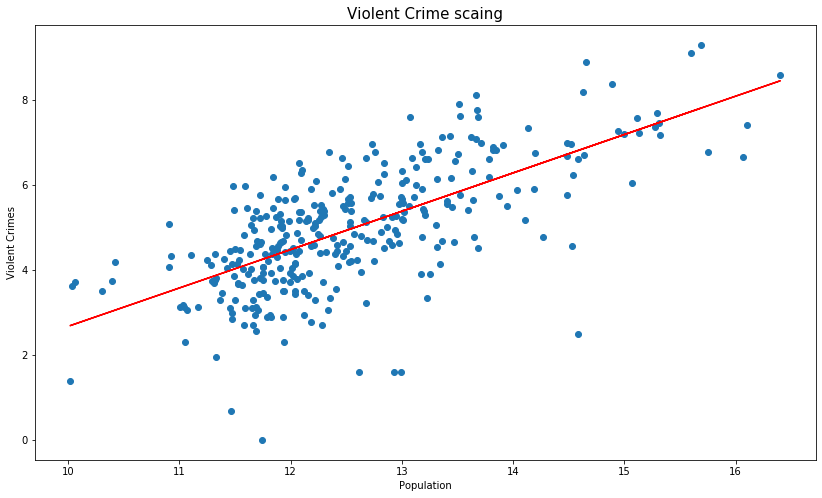

In [34]:
df2 = df.loc[df['Violent_Crimes'] > 0]
logPop2 = np.log(df2['Population'])
logCrime2 = np.log(df2['Violent_Crimes'])
dataLog2 = pd.DataFrame(data=[logCrime2, logPop2]).T
dataLog2.sort_values(by='Violent_Crimes', ascending=False, inplace=True) #Sorting values for better visualization
lmCrime2 = smf.ols('Violent_Crimes~Population', data=dataLog2).fit()
plt.figure(figsize=(14,8))
plt.plot(dataLog2['Population'], dataLog2['Violent_Crimes'], 'o')
plt.title('Violent Crime scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Violent Crimes')
plt.plot(dataLog2['Population'], lmCrime2.predict(), '-r')

In [35]:
lmCrime2.conf_int(alpha=0.05)

,0,1
Intercept,-7.648421,-5.035586
Population,0.797491,1.005114


In [36]:
lmCrime2.conf_int(alpha=0.01)

,0,1
Intercept,-8.062546,-4.621462
Population,0.764583,1.038021


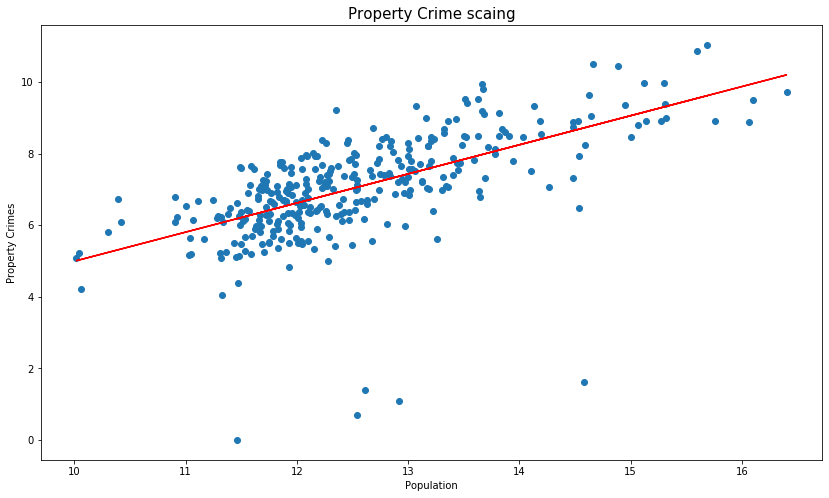

In [37]:
df3 = df.loc[df['Property_Crimes'] > 0]
logPop3 = np.log(df3['Population'])
logCrime3 = np.log(df3['Property_Crimes'])
dataLog3 = pd.DataFrame(data=[logCrime3, logPop3]).T
dataLog3.sort_values(by='Property_Crimes', ascending=False, inplace=True) #Sorting values for better visualization
lmCrime3 = smf.ols('Property_Crimes~Population', data=dataLog3).fit()
plt.figure(figsize=(14,8))
plt.plot(dataLog3['Population'], dataLog3['Property_Crimes'], 'o')
plt.title('Property Crime scaing', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Property Crimes')
plt.plot(dataLog3['Population'], lmCrime3.predict(), '-r')

In [38]:
lmCrime3.conf_int(alpha=0.05)

,0,1
Intercept,-4.526343,-1.745729
Population,0.702375,0.923313


In [39]:
lmCrime3.conf_int(alpha=0.01)

,0,1
Intercept,-4.967071,-1.305000
Population,0.667356,0.958331


As we can see from above, the total crime and property crime q is less than 1 no matter for 95%CI or 99%CI, while the q of violent crimes is greate than 1 in 95%CI, not to say 99%CI.

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [40]:
dataLog['msaName']=dataLog.index.map(msaNames)
dataLog.head()

,Crimes,Population,msaName
msa,,,
26420,11.198352,15.685801,"Houston-The Woodlands-Sugar Land, TX (Metropol..."
33100,11.025784,15.595504,"Miami-Fort Lauderdale-West Palm Beach, FL (Met..."
36740,10.683661,14.657689,"Orlando-Kissimmee-Sanford, FL (Metropolitan St..."
45300,10.571035,14.885580,"Tampa-St. Petersburg-Clearwater, FL (Metropoli..."
24860,10.098890,13.667548,"Greenville-Anderson-Mauldin, SC (Metropolitan ..."


In [41]:
dataLog['CrimeRes']=lmCrime.predict()-dataLog['Crimes']
dataLog.sort_values(by='CrimeRes',ascending=False).head(5)

,Crimes,Population,msaName,CrimeRes
msa,,,,
11020,0.000000,11.743680,"Altoona, PA (Metropolitan Statistical Area)",6.483133
21500,0.693147,12.536969,"Erie, PA (Metropolitan Statistical Area)",6.441892
10900,1.098612,12.917970,"Allentown-Bethlehem-Easton, PA-NJ (Metropolita...",6.349525
38300,2.833213,14.582882,"Pittsburgh, PA (Metropolitan Statistical Area)",5.983110
49620,1.609438,12.996244,"York-Hanover, PA (Metropolitan Statistical Area)",5.903023


In [42]:
dataLog.sort_values(by='CrimeRes',ascending=True).head(5)

,Crimes,Population,msaName,CrimeRes
msa,,,,
31420,9.294773,12.347789,"Macon-Bibb County, GA (Metropolitan Statistica...",-2.315198
24860,10.098890,13.667548,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-2.034767
37860,9.490545,13.069133,"Pensacola-Ferry Pass-Brent, FL (Metropolitan S...",-1.918185
35380,9.919656,13.673404,"New Orleans-Metairie, LA (Metropolitan Statist...",-1.850721
36740,10.683661,14.657689,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",-1.805863


### Task 3:Is there any correlation between residual by income and residual by crime?

In [43]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv', encoding = "ISO-8859-1")
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)
demographics['Income']=demographics.Population*demographics['Per capita income']
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [44]:
logInc = np.log(msaDemo['Income'])

In [45]:
dataLog['Income']=dataLog.index.map(logInc)
dataLog['Income'].corr(dataLog['Crimes'])

0.5173583738445174

In [46]:
df1['Income']=df1.index.map(msaDemo['Income'])
df1['Crimes'].corr(df1['Income'])

0.44640639283367695

I would say there is some kind of correlation between income and crime, but it is not really highly correlated. 

I would like to do the correlation between the original data instead of the residual first. Because this does imply something.

Now Let's focus on the residual.

In [47]:
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
dataLog_Inc = pd.DataFrame(data=[logIncome, logPop]).T
dataLog_Inc.sort_values(by='Income', ascending=False, inplace=True) #Sorting values for better visualization
lmIncome = smf.ols('Income~Population', data=dataLog_Inc).fit()
msaDemo['IncRes']=lmIncome.predict()-dataLog_Inc['Income']

In [48]:
msaDemo.head()

,Population,Area,Income,IncRes
msa,,,,
10180,167171,2743.478027,3740034900,0.101101
10420,703017,900.129156,19560044574,-0.025948
10500,156706,1932.557130,3172077530,0.197068
10540,118270,2290.129282,2526602010,0.125354
10580,875567,2811.554500,28078339939,-0.154064


In [49]:
logInc = msaDemo['IncRes']
dataLog['IncRes']=dataLog.index.map(logInc)

In [50]:
dataLog['CrimeRes'].corr(dataLog['IncRes'])

-0.1862216554942585